--------------------------------------------------------------------------------------

* Team member names: Bolin Yang, Shuibenyang Yuan
* Team member IDs: A92111272, A14031016

--------------------------------------------------------------------------------------


# Mini-project 2, DSC 170, Spring 2019
## Advanced Geopandas: spatial join and geoprocessing


In this mini-project, you will explore several common geospatial computations. The goal is to practice with different types of requests against a single layer, and then work on joining several data layers using real data. The goal is to demonstrate your geopandas mastery, and also to show that you can discover datasets and critically evaluate metadata. 

For each dataset that you found and used, explore its metadata and provide a brief description (about 3 sentences): indicate its title, URL, number of records, coordinate reference system, the manner in which it was compiled (as far as you can tell from the metadata), and any data quality considerations, especially those that may influence geometric processing. 

There will be one relatively simple warm-up problem, and one larger and very real problem that the City of San Diego is struggling with. The best creative solutions to the second one will be demonstrated when Scale-SD folks come here to give an invited talk.

Note that the upload file size limit has been removed from the datahub, so you should be able to upload your data.



In [1]:
%matplotlib inline 
import geopandas as gpd
import pandas as pd
import shapely
import warnings
# add packages as needed

--------------------------------------------------------------------------------------
__Problem 1__. 

In an administrative boundaries map of California (find it as a GeoJSON or a shapefile on one of the web sites), find a county named San Diego and return its CRS, polygon coordinates, area (in sq miles), bounding box (in latitude and longitude), and a list of neighboring counties. 

Generally speaking, this will be a function to return geometric characteristics and neighbors of any polygon in an input dataframe (input_gdf) with a given name (poly_name) in a specific column (poly_name_field). Most lilely, in the database you find there will be a unique "San Diego" record - but it won't harm to do dissolve, just in case.

```python
def poly_geometry(input_gdf, poly_name_field, poly_name):

# YOUR CODE HERE

    return crs, poly_coords, area, bounding_box, neighbors
```



### Solution for problem 1: code and dataset description:

In [ ]:
# problem 1 solution stud code
def poly_geometry(input_gdf, poly_name_field, poly_name):

# YOUR CODE HERE

    return crs, poly_coords, area, bounding_box, neighbors

In [2]:
# problem 1 solution stud code
def poly_geometry(input_gdf, poly_name_field, poly_name):
    # find the polygon that we are interested in
    gdf = input_gdf[input_gdf["NAME"]==poly_name]
    
    # compute the crs of the geometry
    crs = gdf.geometry.crs
    
    # find the polygon of the geometric obejct
    poly_coords = gdf.geometry
    
    # find the area of the polygon
    area = gdf.geometry.area.iloc[0]*0.00000038610
    
    # the bouding rectangle of the polygon
    bounding_box = gdf.geometry.envelope.to_crs("EPSG:4326")
    
    # find the neighbors of the polygon
    neighbors = input_gdf[input_gdf.geometry.touches(gdf.geometry.iloc[0])].NAME.tolist()
    
    return crs, poly_coords, area, bounding_box, neighbors

__Problem 1 dataset description:__

The metadata's title is CA County Boundaries. The url is https://data.ca.gov/sites/default/files/CA_Counties_0.zip.
It has 58 records. The coordinate reference system is EPSG3857. Current geography in the 2016 Shapefiles generally reflects the boundaries of governmental units in effect as of January 1, 2016, and other legal and statistical area boundaries that have been adjusted and/or corrected since the 2010 Census. This vintage includes boundaries of governmental units that match the data from the surveys that use 2016 geography, such as the 2016 Population Estimates and the 2016 American Community Survey.

In [ ]:
# running the function

input_gdf = gpd.read_file('  your file here  ')
poly_name_field = 'Counties'  # or whatever is in the file
poly_name = 'San Diego' # or whatever is in the file

crs,poly_coords,area,bbox,neighbors = poly_geometry(input_gdf, poly_name_field, poly_name)

print(crs)
print(poly_coords)
print(area)
print(bbox)
print(neighbors)


In [3]:
# running the function

input_gdf = gpd.read_file('CA_Counties_TIGER2016.shp')
poly_name_field = 'Counties'  # or whatever is in the file
poly_name = 'San Diego' # or whatever is in the file

crs,poly_coords,area,bbox,neighbors = poly_geometry(input_gdf, poly_name_field, poly_name)

print(crs)
print(poly_coords)
print(area)
print(bbox)
print(neighbors)


{'init': 'epsg:3857'}
8    POLYGON ((-13073075.79626082 3919158.523585408...
Name: geometry, dtype: object
6456.133353621612
8    POLYGON ((32.52883673637251 -117.6110930236377...
dtype: object
['Riverside', 'Orange', 'Imperial']


--------------------------------------------------------------------------------------

__Problem 2.__

Food choices in low and medium income (LMI) neighborhoods are limited, as these areas lack healthy food stores or other fresh food delivery mechanisms. There may be more fast food stores than fresh produce shops. Population is relatively poor, and filling the food basket with healthy options hasn't been an overwhelming priority for many households. Such areas are referred to as "food deserts". 

See these articles:
* https://www.sandiegouniontribune.com/news/data-watch/sdut-san-diego-food-deserts-2016may15-htmlstory.html (see food desert definitions here)
* https://www.npr.org/sections/thesalt/2013/03/13/174112591/how-to-find-a-food-desert-near-you
* https://www.geospatial.institute/wp-content/uploads/2018/03/Mapping-Food-Desserts-in-Southern-California-Counties.pdf 
* https://www.sandiegoreader.com/news/2018/sep/04/stringers-imperial-beach-food-desert/# (a recent one, about IB)
* https://www.kpbs.org/news/2018/mar/29/sdsu-students-take-food-deserts-national-city/
* http://newscenter.sdsu.edu/sdsu_newscenter/news_story.aspx?sid=74890 
* https://grist.org/food/americas-worst-food-deserts-map-lovers-edition/
* https://ucsdcommunityhealth.org/news/promoting-produce-consumption/

There was also a Master's thesis at UCSD: https://escholarship.org/uc/item/0s78j9g2

Don't read them all, just skim to understand the issues and get ideas.

We'll analyze the current state of food deserts, using lists of businesses that operate in San Diego, and social-demographic data from SanDAG (by census tracts). 

For the list of businesses, let's use City of San Diego tax certificates:
https://data.sandiego.gov/datasets/business-listings/. These data are current, and include lat/lon. They also include detailed NAICS codes for each business. This is the recommended dataset. We are interested in active certificates. We are also interested in types of businesses that are relevant to healthy (and unhealthy) food options. Healthy food options would include FOOD (HEALTH) SUPPLEMENT STORES, GROCERY STORES and GROCERY (EXCEPT CONVENIENCE) STORES. Unhealthy food options would include FOOD SERVICES & DRINKING PLACES, FULL-SERVICE RESTAURANTS, LIMITED-SERVICE EATING PLACES, LIMITED-SERVICE RESTAURANTS (a.k.a fast food places), BEER, WINE & LIQUOR STORES, TOBACCO STORES, CONVENIENCE STORES (a mixed bag...). We have provided this as part of the assignment. You don't need to download it, but you may if you wish.


There is also "SanDAG's point locations of business sites" in San Diego County (see metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Business&Name=BUSINESS_SITES.pdf). This is already a shapefile, so this is a plus (but note  disclaimers in the metadata). The date is 8/17/2017, i.e. not as current. Industry codes are not as detailed as NAICS in the City's dataset. 

We'll also get relevant spatial data layers from SanDAG: Promise Zone, and census tract boundaries. Note that you'll need to create a free account to access Sandag GIS data warehouse.

Descriptions of promise zones can be found at these links:
* https://www.hud.gov/sites/documents/SAN-DIEGO_ZONE_3RD.PDF
* https://www.sandiego.gov/economic-development/sdpromisezone/maps
* https://www.sandiego.gov/economic-development/sdpromisezone

To download the shapefiles, visit the SanDAG's "Maps and GIS" section:
* Promise Zone is under Business. Metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Business&Name=Promise_Zone_SD.pdf. Alternatively, you can use https://data.sandiego.gov/datasets/promise-zone/
* Census tracts are under Census. Metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Census&Name=CENSUS_TRACTS_2010.pdf. 

Social-demographic data by census tracts can be downloaded from SanDAG at https://sandag.org/index.asp?classid=26&fuseaction=home.classhome. You can try to find the data yourself - but  we also include an xlsx file with some income statistics by census tracts. 

San Diego County municipal boundaries (metadata at http://rdw.sandag.org/Account/GetFSFile.aspx?dir=Jurisdiction&Name=Municipal_Boundaries.pdf) can be downloaded from the same GIS Data Warehouse, under the "Jurisdiction" section. Alternatively, use https://data.sandiego.gov/datasets/san-diego-boundary/ (we only need the boundary of San Diego city, so the latter is quite sufficient.)

Your tasks:

1. Download the data - promise zone, census tracts, jurisdictions (census tracts social-demographic data and businesses data are provided but you can download as well if you wish), read them into geopandas dataframes, and merge social-demographic data with tract boundaries as needed.

2. Subset the businesses (figure out, from NAICS descriptions, which businesses are likely to provide healthy food options, and which unhealthy. You can use our suggestions above but also feel free to deviate from them as long as you justify your choices.)

3. Determine census tracts intersecting with the promise zone, and all other census tracts within the boundary of San Diego.

4. For each census tract marked as belonging to the promise zone, and the other tracts within the city limits, calculate the number of healthy and not-healthy options within that tract. 

5. Compute the ratio of healthy and non-healthy options, and build a regression model showing how it depends on social-demographic characteristics, such as median income or number of people in lowest and highest income brackets. You may use sklearn on this dataframe by tracts to compute a linear regresson (as you did in DSC80. As a refresher, you may also check out https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9, https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606, https://stackoverflow.com/questions/29934083/linear-regression-on-pandas-dataframe-using-sci-kit-learn/29937049). Provide a brief description of regression results.

6. Generate a map showing the ratio of healthy and not healthy food options, and the locations of stores offering healthy food options. 

7. Extra Credit: Think of additional variables that you could bring into this analysis, and try to include them in the regression. ScaleSD is running a hackathon on this topic, and they have a good collection of data sources: https://www.scalesd.com/hackathon-2019/food-insecurity.html. 


We won't provide a skeleton for this problem. This is a much more open project than before. 


### Solution for problem 2: code, dataset descriptions, discussion of regression results:

__Problem 2 dataset descriptions:__

 Your text here

In [4]:
# Q1
# load all datas
business = pd.read_csv('sd_businesses_active_since08_datasd.csv')
promise_zone = gpd.read_file('Promise_Zone_SD.shp')
census_tracts = gpd.read_file('CENSUS_TRACTS_2010.shp')
jurisdictions = pd.read_excel('socio-demographic.xlsx')
sd_boundaries = gpd.read_file('MUNICIPAL_BOUNDARIES.shp')

# merge tract with corresbonding social demographic
temp = jurisdictions[jurisdictions.YEAR == 2016].pivot_table(index = 'TRACT', columns = 'INCOME GROUP', values = 'HOUSEHOLDS')
merged = census_tracts.merge(temp, on = "TRACT")

In [5]:
# Q2
# find the list for healthy and unhealthy tags
healthy_list = ['FOOD (HEALTH) SUPPLEMENT STORES', 'GROCERY STORES', 'GROCERY (EXCEPT CONVENIENCE) STORES']
unhealthy_list = ['FOOD SERVICES & DRINKING PLACES', 'FULL-SERVICE RESTAURANTS', 'LIMITED-SERVICE EATING PLACES', 
                  'LIMITED-SERVICE RESTAURANTS', 'BEER, WINE & LIQUOR STORES', 'TOBACCO STORES', 'CONVENIENCE STORES']

# find the location of the healthy and unhealthy food stores
sd_healthy = business.loc[business['naics_description'].isin(healthy_list)]
sd_unhealthy = business.loc[business['naics_description'].isin(unhealthy_list)]

In [6]:
# Q3 
# intersect the tracts with promise zone, and also find the tracts outside the promise zone
tract_promise = census_tracts[census_tracts.intersects(promise_zone.geometry.iloc[0])]
other_tract = census_tracts[~census_tracts.intersects(promise_zone.geometry.iloc[0])]

In [7]:
# Q4
from shapely.geometry import Point
warnings.filterwarnings("ignore")

# create gdf for healthy and unhealthy stores
sd_healthy['geometry'] = sd_healthy.apply(lambda x: Point(x.longitude, x.latitude), axis = 1)
healthy_gdf = gpd.GeoDataFrame(sd_healthy, crs={'init':'epsg:4326'}, geometry='geometry')
healthy_gdf = healthy_gdf.to_crs({'init':'epsg:2230'})
sd_unhealthy['geometry'] = sd_unhealthy.apply(lambda x: Point(x.longitude, x.latitude), axis = 1)
unhealthy_gdf = gpd.GeoDataFrame(sd_unhealthy, crs={'init':'epsg:4326'}, geometry='geometry')
unhealthy_gdf = unhealthy_gdf.to_crs({'init':'epsg:2230'})

# find how many healthy and unhealthy stores within and without promise zone
tract_promise["healthy"] = tract_promise.apply(lambda x: healthy_gdf.geometry.within(x.geometry).sum(), axis=1)
tract_promise["unhealthy"] = tract_promise.apply(lambda x: unhealthy_gdf.geometry.within(x.geometry).sum(), axis=1)
other_tract["healthy"] = other_tract.apply(lambda x: healthy_gdf.geometry.within(x.geometry).sum(), axis=1)
other_tract["unhealthy"] = other_tract.apply(lambda x: unhealthy_gdf.geometry.within(x.geometry).sum(), axis=1)

In [8]:
# Q5

# find ratio of healthy to unhealthy stores in and out of promise zone
promise_rate = tract_promise.healthy.sum()/tract_promise.unhealthy.sum()
other_rate = other_tract.healthy.sum()/other_tract.unhealthy.sum()
print("Promise zone healthy to unhealthy ratio: " + str(promise_rate))
print("Other zone healthy to unhealthy ratio: " + str(other_rate))

Promise zone healthy to unhealthy ratio: 0.09868421052631579
Other zone healthy to unhealthy ratio: 0.05581668625146886


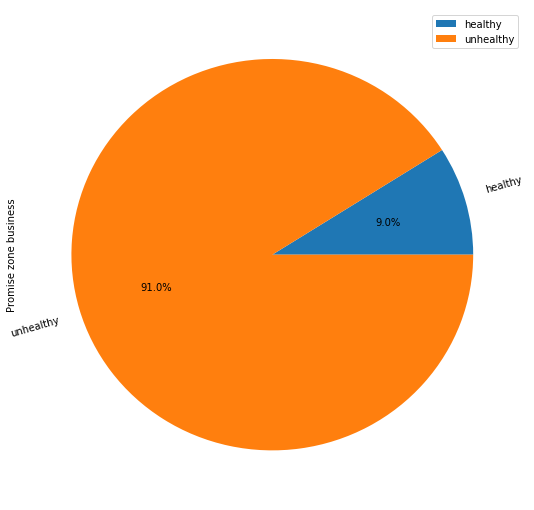

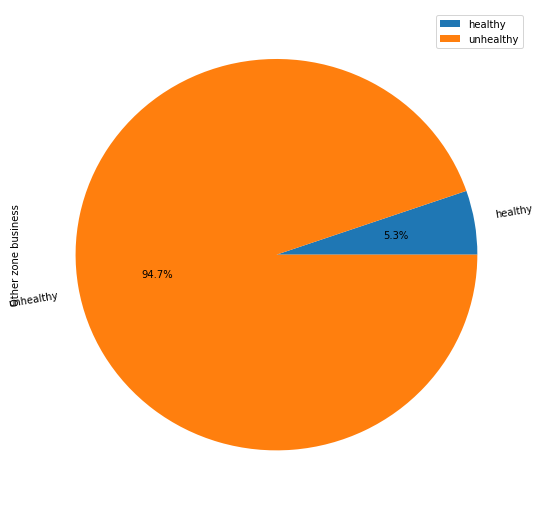

In [9]:
# plot the ratio in pie chart
healthy_pie_df = pd.DataFrame({"Promise zone business": [tract_promise.healthy.sum(), tract_promise.unhealthy.sum()]},
                      index=["healthy", "unhealthy"])
healthy_pie_df.plot(kind="pie", y="Promise zone business", figsize=(9, 9), autopct='%1.1f%%',rotatelabels=True)

unhealthy_pie_df = pd.DataFrame({"Other zone business": [other_tract.healthy.sum(), other_tract.unhealthy.sum()]},
                      index=["healthy", "unhealthy"])
unhealthy_pie_df.plot(kind="pie", y="Other zone business", figsize=(9, 9), autopct='%1.1f%%',rotatelabels=True)


In [10]:
# merge the tract data with the social demographic data
df = tract_promise[["TRACT", "healthy", 'unhealthy']].append(other_tract[["TRACT", "healthy", 'unhealthy']])
data = merged.merge(df, on = "TRACT")

In [11]:
# Q6

# compute the difference of normalized healthy store ratio and normalized unhealthy store ratio
data["ratio"] = data.healthy/data.healthy.sum() - data.unhealthy/data.unhealthy.sum()

# use linear regression to predict the ratio based on the social demographice charctistic
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = data.drop(["TRACT", "SHAPE_AREA", "SHAPE_LEN", "geometry", "ratio", "healthy", "unhealthy"], axis=1)
y = data['ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lg = LinearRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)

# compute root mean square error
from sklearn import metrics
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE: 0.005648964338644471


In [12]:
# compute the coeffeicent of the variables
coeff = zip(X.columns, lg.coef_)
pd.Series(dict(coeff)).sort_values()

$125,000 to $149,999   -7.803234e-06
$60,000 to $74,999     -5.874884e-06
Less than $15,000      -4.162093e-06
$45,000 to $59,999     -3.019886e-06
$100,000 to $124,999   -1.943782e-06
$75,000 to $99,999     -1.978451e-07
$200,000 or more        5.903062e-07
$30,000 to $44,999      1.538619e-06
$15,000 to $29,999      2.827132e-06
$150,000 to $199,999    7.832892e-06
dtype: float64

Text(0.5,1,'Choropleth map on the difference of normalized healthy store ratio and normalized unhealthy store ratio in San Diego')

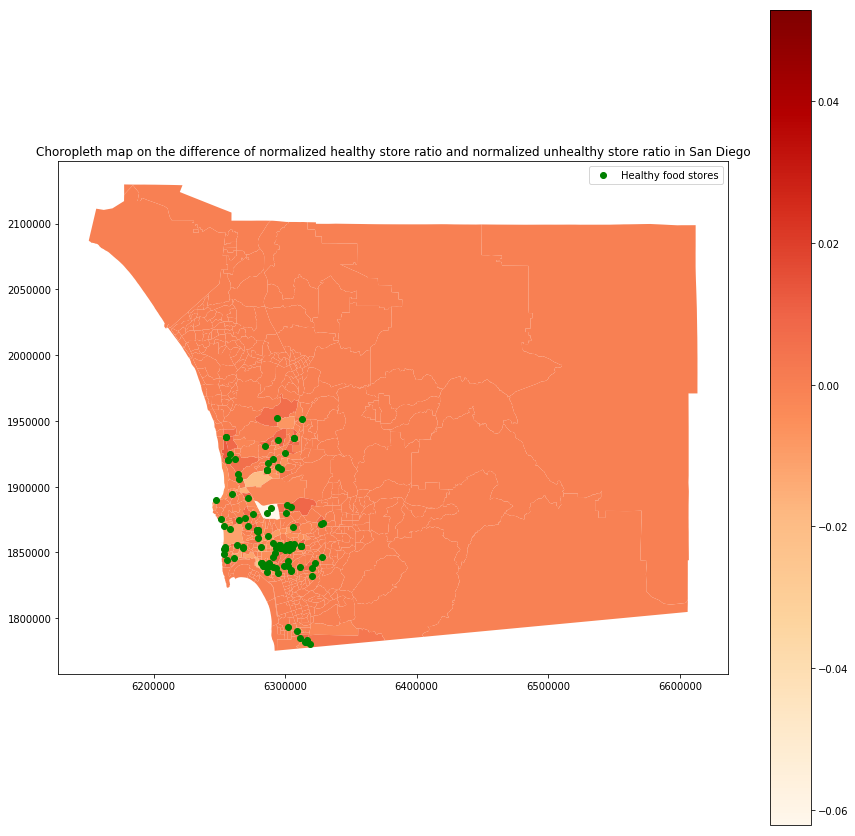

In [13]:
# Q7
# plot the map based on the difference of normalized healthy store ratio and normalized unhealthy store ratio
map1 = data.plot(figsize=(15,15), column="ratio", cmap='OrRd', legend=True)

# plot the healthy store on the map
healthy_gdf.plot(ax=map1, color='green', label="Healthy food stores")
map1.legend()
import matplotlib.pyplot as plt
plt.title("Choropleth map on the difference of normalized healthy store ratio and normalized unhealthy store ratio in San Diego")

__Problem 2 discussion of linear regression results:__

From the pie chart we generated, we found out that there are more option for healthy food than unhealthy food in the promise zone compared to the other zone. (9% for promise zone, and 5.3% for the other zone) This is counter intuition, as we expect fewer healthy food options in the promise zone as fewer people are able to afford these food over there. In order to further validify our result, we train a linear regression model on the social demographic values to predict the ratio of the healthy to unhealthy store. The coeffient for each variables are listed in the Q7 above, we found out that people with extreme high income and people with extrem low income tend to prefert healthy food, thus their places have more healthy food options, which match the result of the ratio.

## Responses to the extra credit questions:

Your text here

Responses to the extra credit questions:

We decide to use Urban area and rural area to be our additional variable with assumption that urban area may have more healthy food restaurants than rural area. Our dataset is found in http://rdw.sandag.org. The dataset consists the polygons of rural area of San Diego county. We use one-hot encoder to label urban area as 1 and rural area as 0. Then we plan to put them with other features into our sk-learn linear regression pipeline to see our results.

In [14]:
# EC

# clean the data
rural = gpd.read_file('REGIONAL_CATEGORIES.shp')
rural = rural.dropna(subset = ['geometry'])

# find the rural part and urban part of san diego
dicision = merged.geometry.unary_union.difference(rural.geometry.unary_union)
urban = merged.loc[merged.geometry.within(dicision)]
rural = merged.loc[~merged.geometry.within(dicision)]
urban = urban.merge(df, on = "TRACT")
rural = rural.merge(df, on = 'TRACT')
urban['urban'] = [1 for i in range(len(urban))]
rural['urban'] = [0 for i in range(len(rural))]
data_ec = urban.append(rural)

# computre the ratio for healthy food
data_ec["ratio"] = data.healthy/data.healthy.sum() - data.unhealthy/data.unhealthy.sum()

In [24]:
# we train on all the variable including one more varible - "urban"
X = data_ec.drop(["TRACT", "SHAPE_AREA", "SHAPE_LEN", "geometry", "ratio", "healthy", "unhealthy"], axis=1)
y = data_ec['ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lg = LinearRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)

# compute root mean square error
from sklearn import metrics
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

RMSE: 0.004940828723507627


In [16]:
# find the coeff for the linear regression
coeff = zip(X.columns, lg.coef_)
pd.Series(dict(coeff)).sort_values()

$125,000 to $149,999   -1.990863e-05
$60,000 to $74,999     -1.618704e-05
$30,000 to $44,999     -2.805489e-06
$200,000 or more        3.160441e-07
Less than $15,000       1.316728e-06
$15,000 to $29,999      3.484836e-06
$100,000 to $124,999    4.125310e-06
$45,000 to $59,999      4.970873e-06
$150,000 to $199,999    6.071062e-06
$75,000 to $99,999      1.060708e-05
urban                   4.320930e-04
dtype: float64

### Discussion to the linear regression result

After observing the our new machine learning results, we see that urban is the most influential feature than others in our linear regression model (sorted by coeficient). The map also shows the most of the healthy food are in urban area. Then the additional variable urban and rural is a important feature which can significantly influence the distribution of healthy food restaurant.

Text(0.5,1,'Urban area vs Rural area in San Diego')

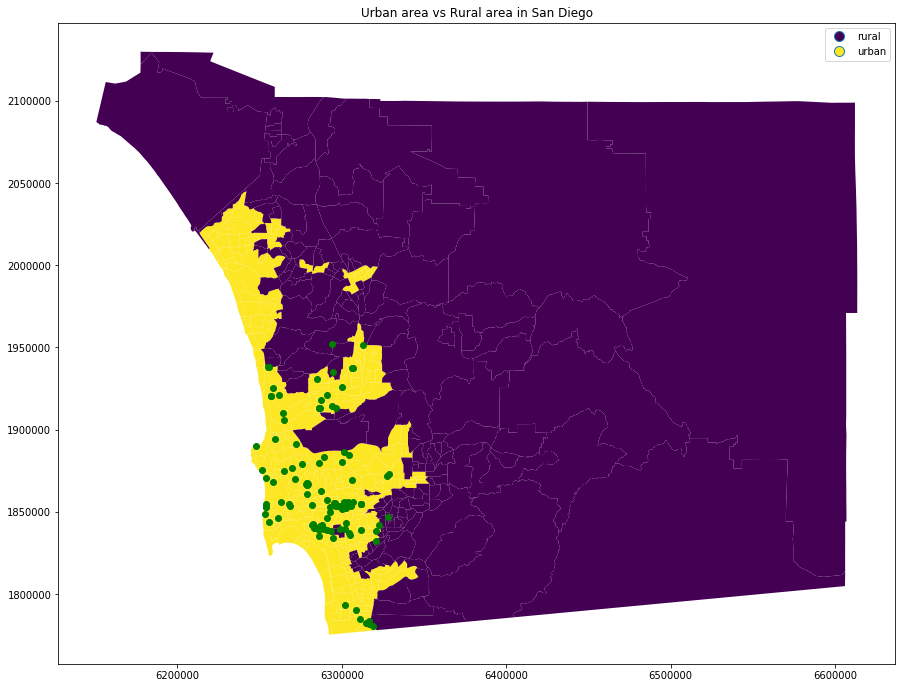

In [17]:
# draw the map of urban aread and rural area with healthy food stores on it
data_ec["urban_label"] = data_ec.urban.apply(lambda x: "urban" if x==1 else "rural")
map2 = data_ec.plot(column="urban_label", figsize=(15, 15), legend=True, cmap= 'viridis')

healthy_gdf.plot(ax=map2, color='green', label="Healthy food stores", legend=True)
plt.title("Urban area vs Rural area in San Diego")

In [22]:
data_ec = data_ec.drop("urban_label", axis=1)

In [18]:
# Please let us know how much time you spent on this project, in hours: 
# (we will only examine distributions and won't look at individual responses)
assignment_timespent = 20
extracredit_timespent = 5